# 언제 지하철을 가장 많이 이용할까?

In [1]:
import pandas as pd

raw = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/subway_raw.xlsx')
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


# 가장 승객이 많은 날짜?

In [3]:
data_date = raw.pivot_table(index=['사용일자','요일'], values = '승차총승객수', aggfunc='sum' )
data_date

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294
...,...,...
20190626,수,8295254
20190627,목,8197084
20190628,금,8599857


In [4]:
data_date_sort = data_date.sort_values(by='승차총승객수',ascending=False)
data_date_sort.head()

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472


# 5월에 승차객수가 많은가?
# 금요일에 승차객수가 많은가?

가정 1) 5월에 승차객수가 많다

월별 승차객수 비교

In [5]:
# 연월일 데이터에서 연월/월일 데이터를 정리하겠습니다. 

yearmonth_list = []
monthday_list = []

for date in raw['사용일자']:
  yearmonth = str(date)[:6]
  monthday = str(date)[4:]
  yearmonth_list.append(yearmonth)
  monthday_list.append(monthday)

raw['연월'] = yearmonth_list
raw['월일'] = monthday_list

raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [6]:
# 월별 승객수 정리

data_month = raw.pivot_table(index = '연월', values = '승차총승객수',aggfunc='sum')
data_month

,승차총승객수
연월,
201901,221848014
201902,190335812
201903,157782643
201904,218832085
201905,236267004
201906,221547039


In [7]:
data_month = data_month.sort_values(by = '승차총승객수')
data_month

,승차총승객수
연월,
201903,157782643
201902,190335812
201904,218832085
201906,221547039
201901,221848014
201905,236267004


5월에 승객수가 가장 많다

가정 2) 금요일에 승객수가 가장 많다

In [8]:
# 요일별 승객수를 정리하겠습니다. 

data_week = raw.pivot_table(index='요일', values = '승차총승객수', aggfunc='sum')
data_week.sort_values(by = '승차총승객수', ascending=False)
data_week

,승차총승객수
요일,
금,214064383
목,197522587
수,176959733
월,187921393
일,114626732
토,157401217
화,198116552


월별로 편차가 존재 할까?

In [9]:
# 먼저 1개월 데이터만 
df_selected = raw[raw['연월'] == '201901']
df_selected.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [10]:
# 1개월 데이터에서 일자/요일별 승객수 계 데이터를 정리

df_pivot = df_selected.pivot_table(index=['월일','요일'], values = '승차총승객수', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [12]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


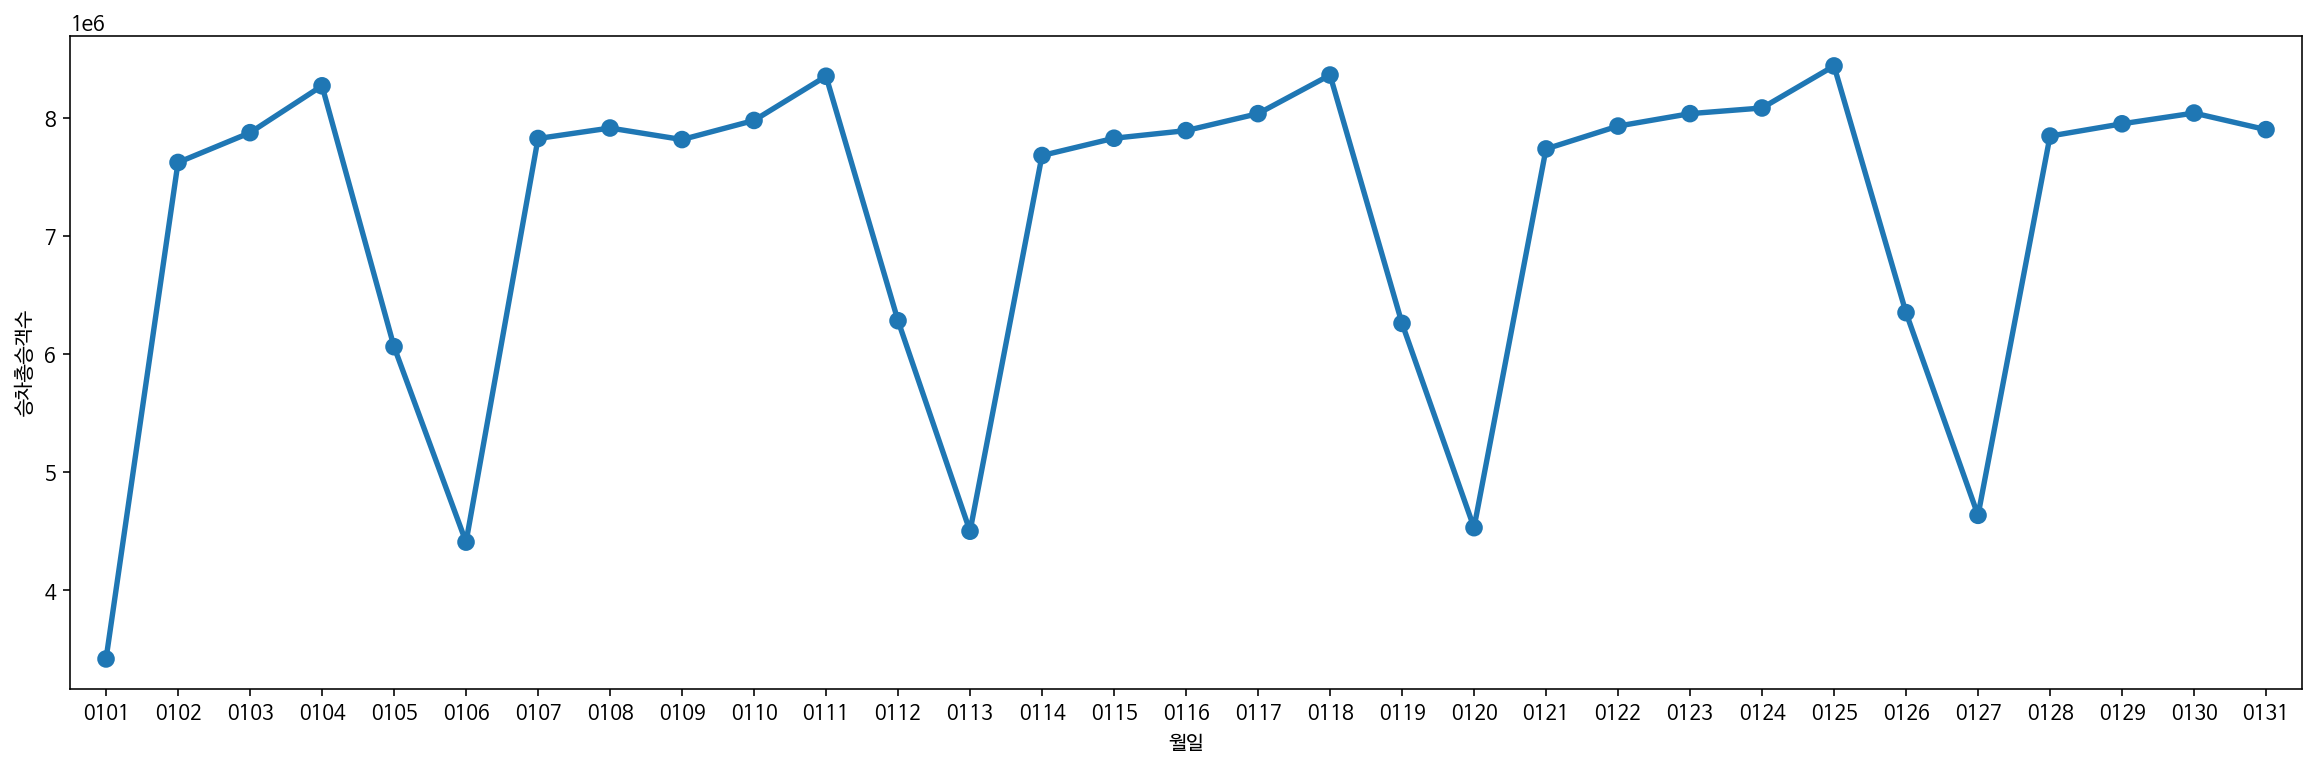

In [15]:
# 일자별 승객수를 그래프로
fig,ax = plt.subplots(figsize=(20,6))
sns.pointplot(data = df_pivot,x = '월일', y='승차총승객수')

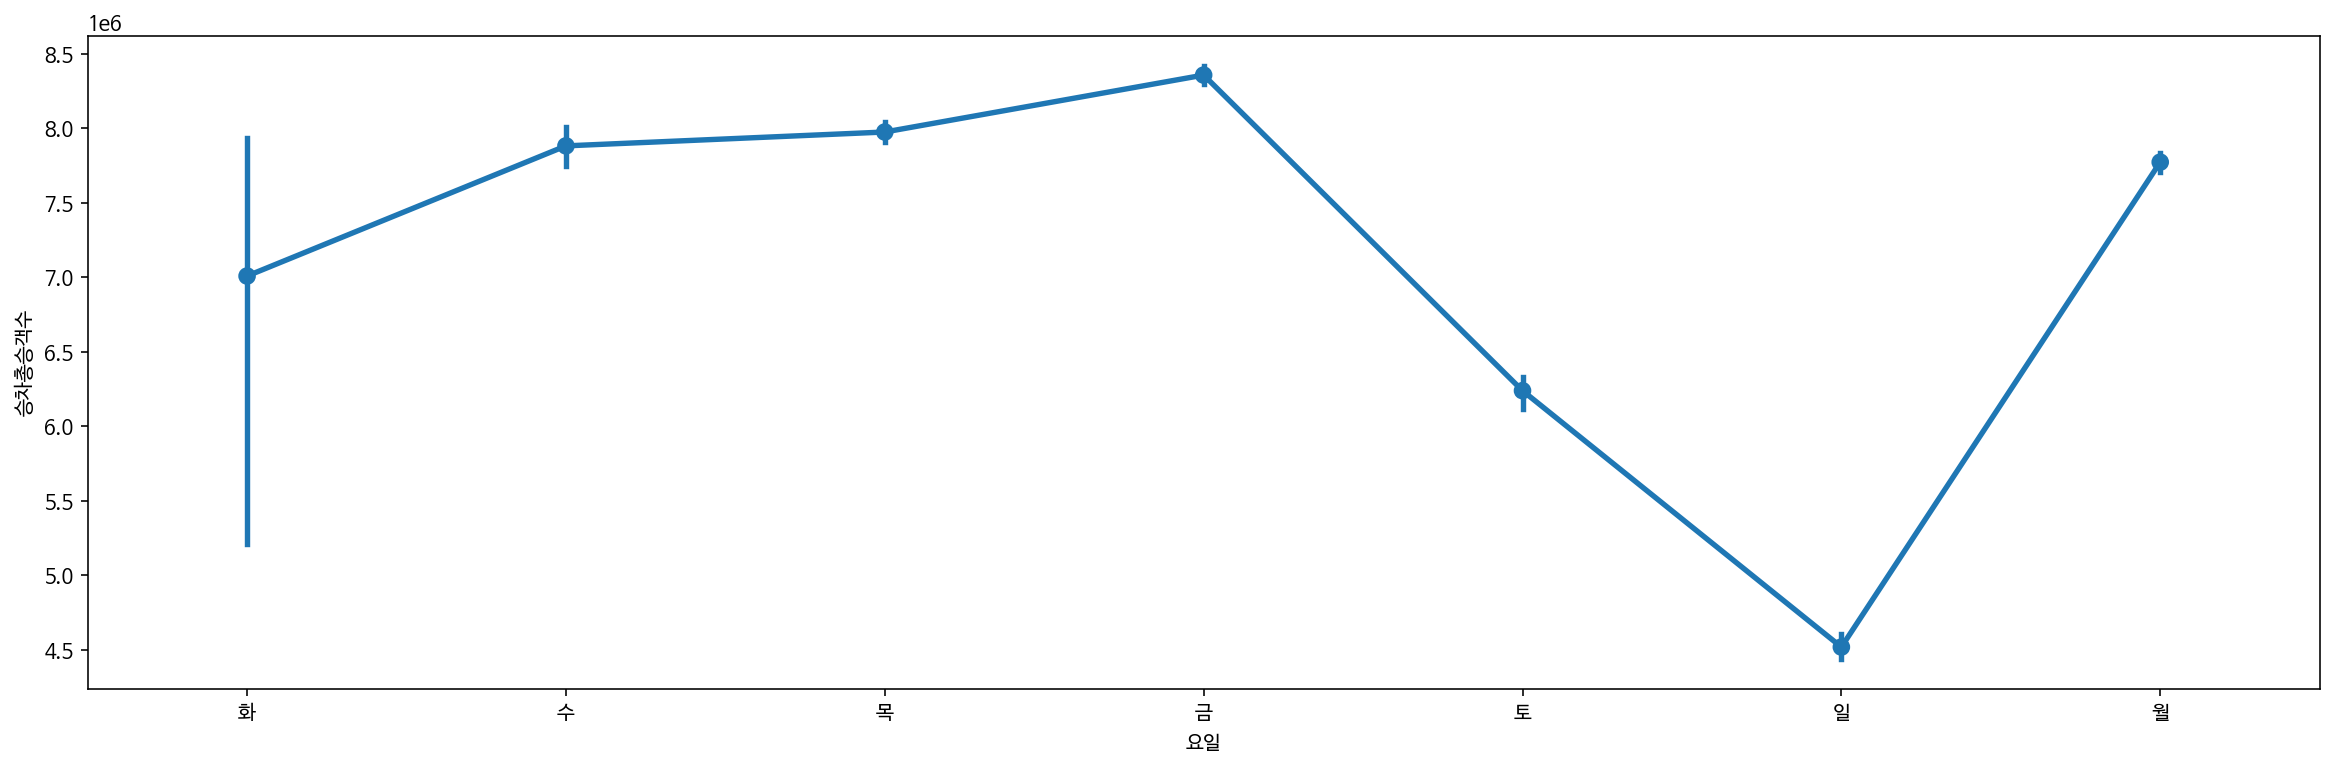

In [16]:
# 요일별 승객수를 그래프로 살펴보겠습니다. 


fig, ax = plt.subplots( figsize=(20,6) )
# 그래프 그리기
sns.pointplot(data = df_pivot, x = '요일', y = '승차총승객수')

월별 일자 별 그래프 그리기

In [25]:
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201906', '201905'],
      dtype=object)

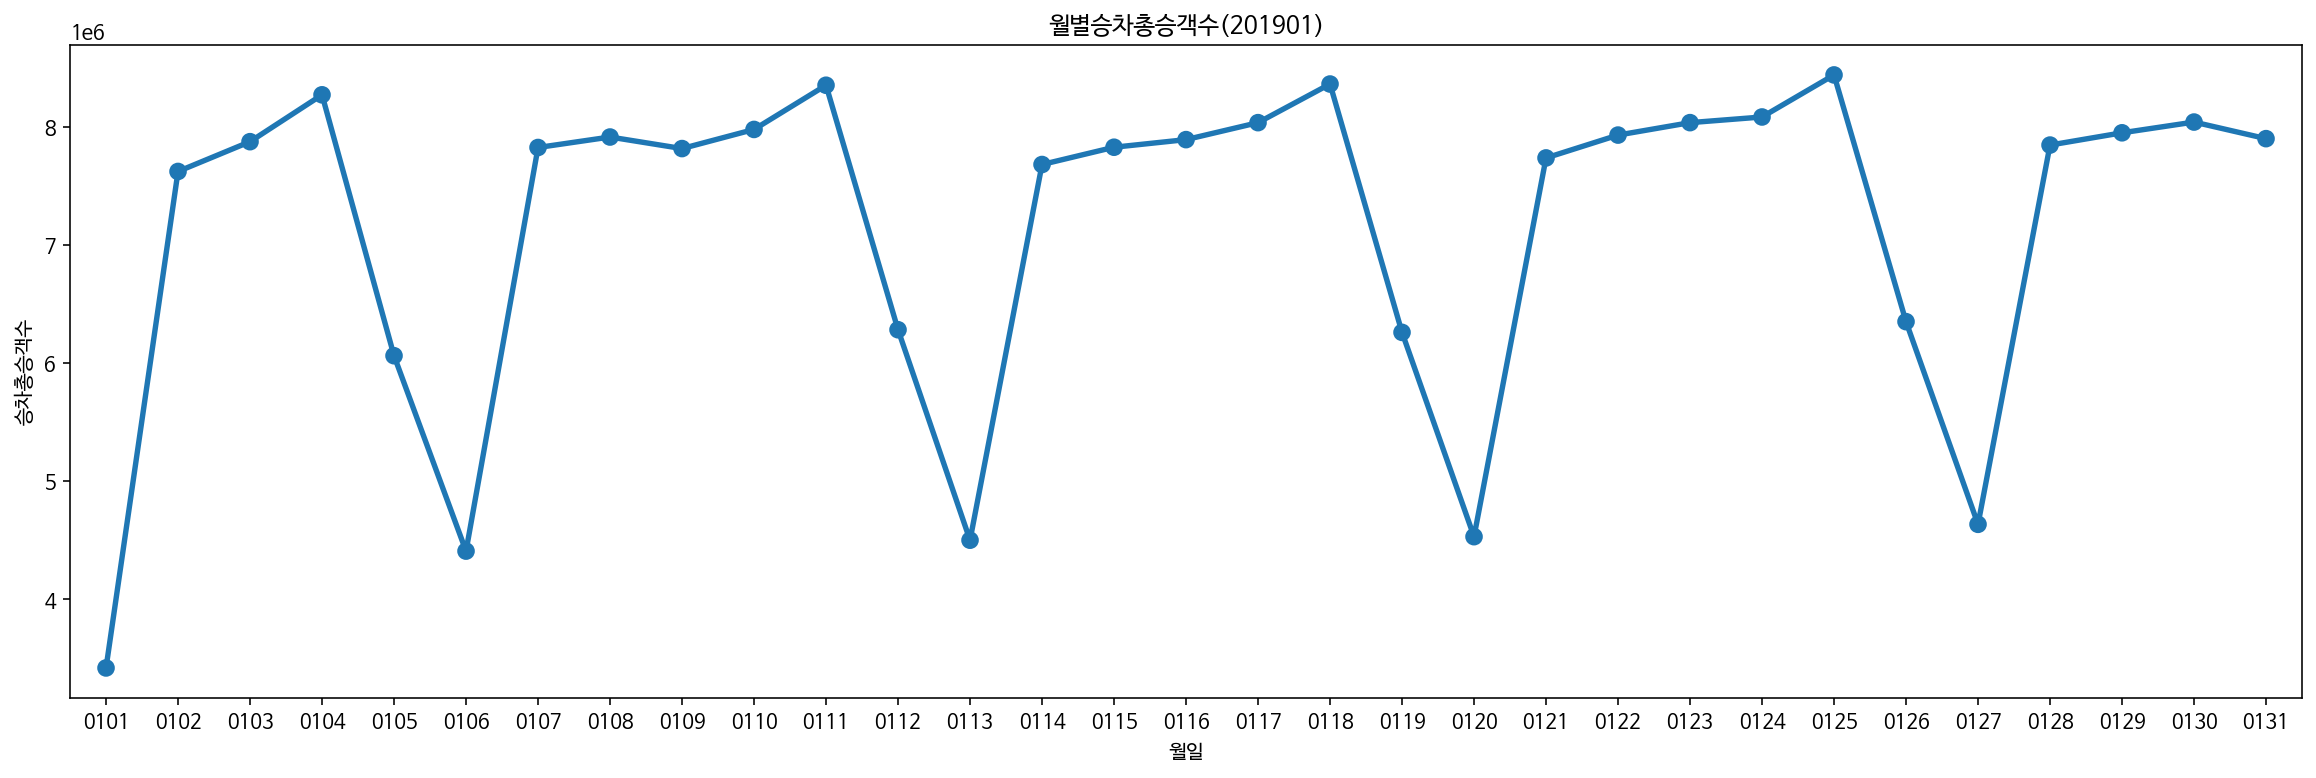

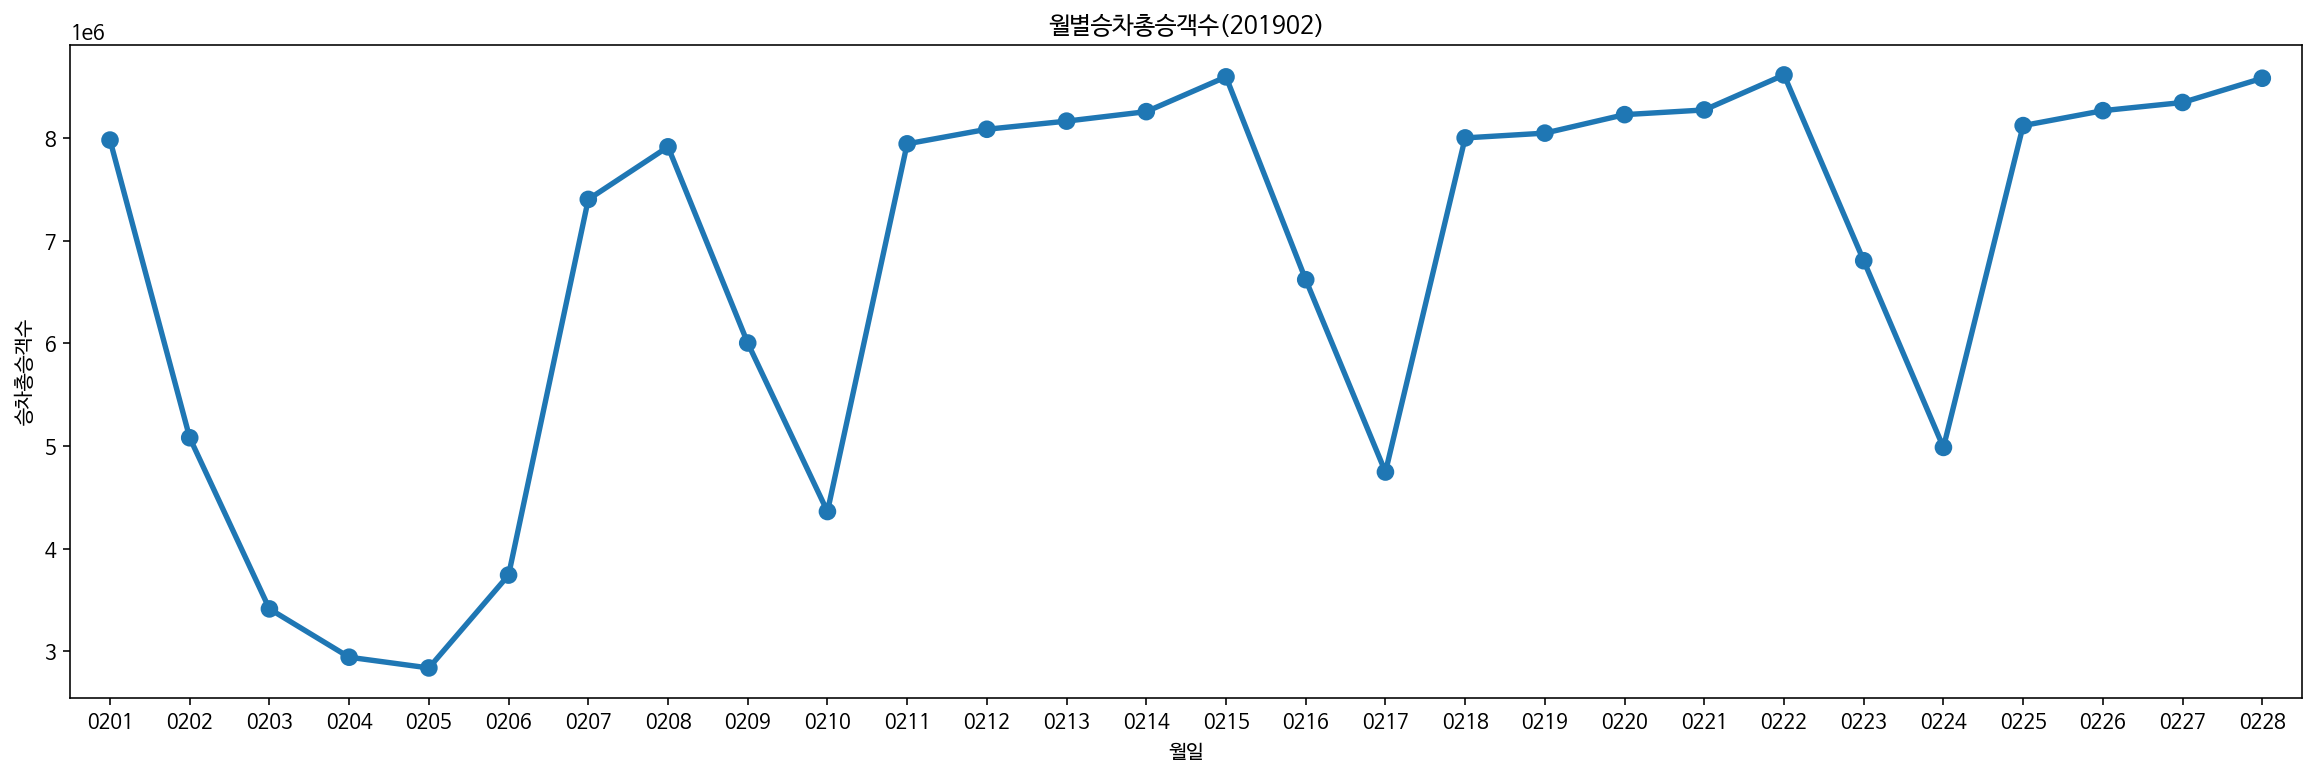

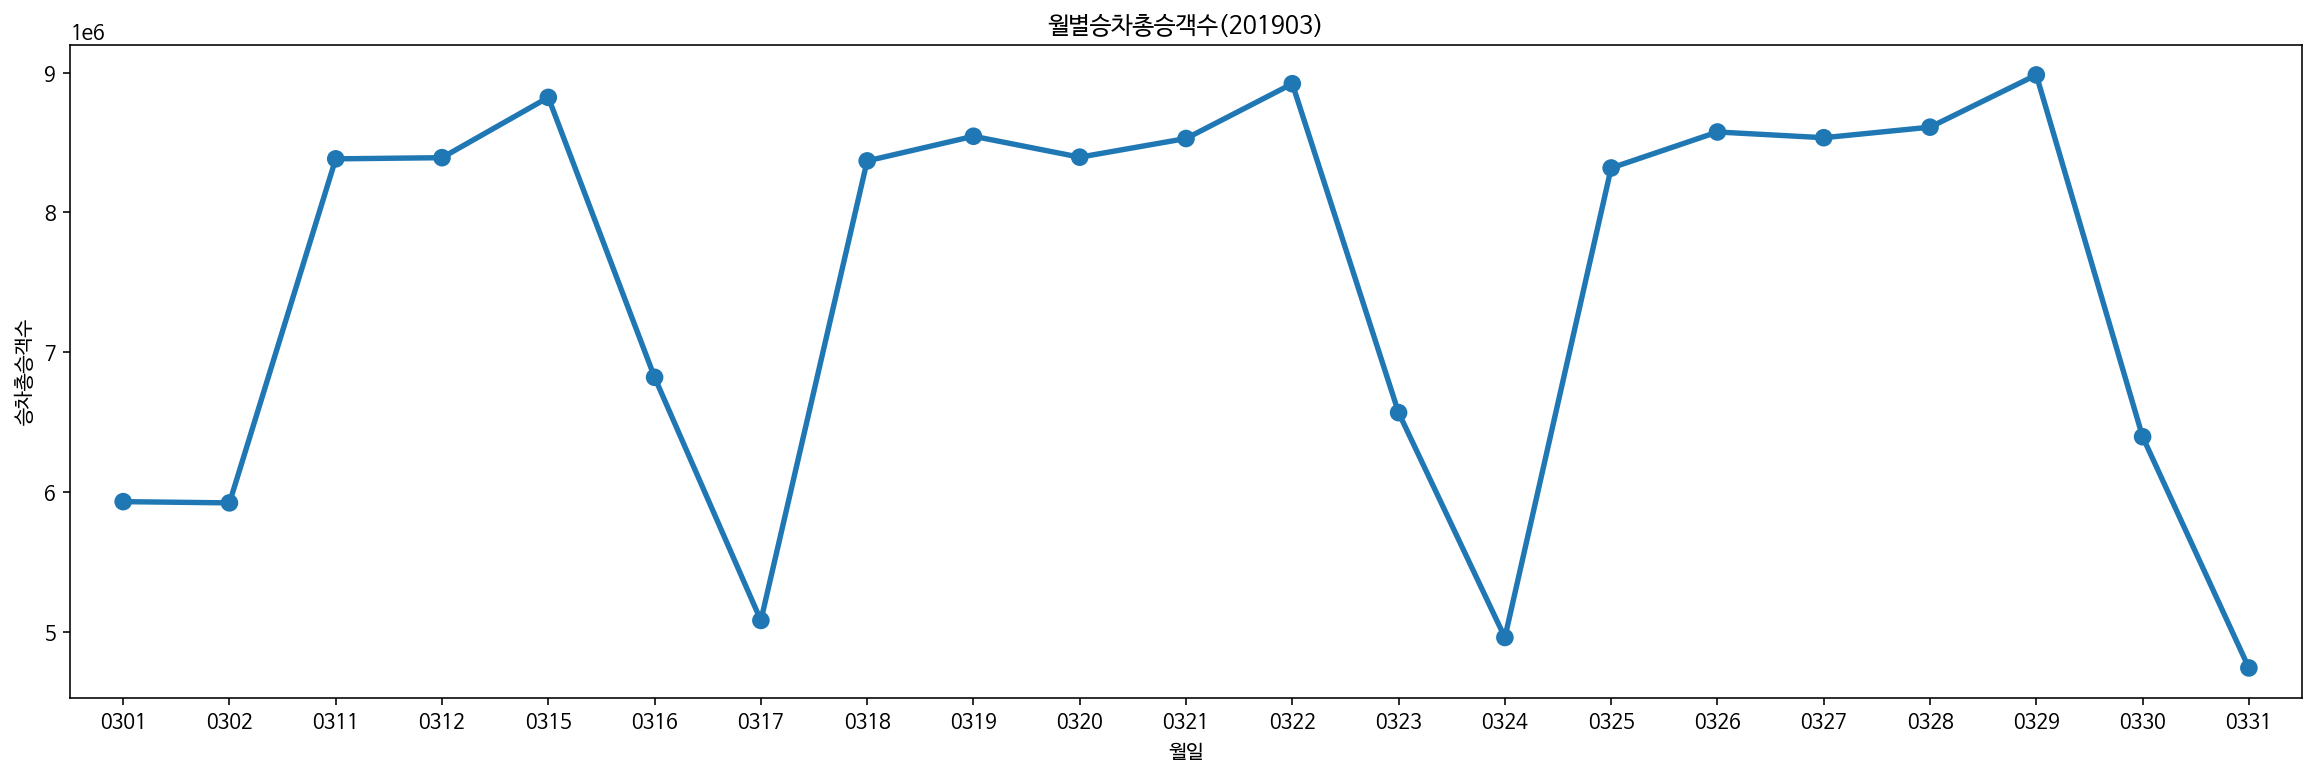

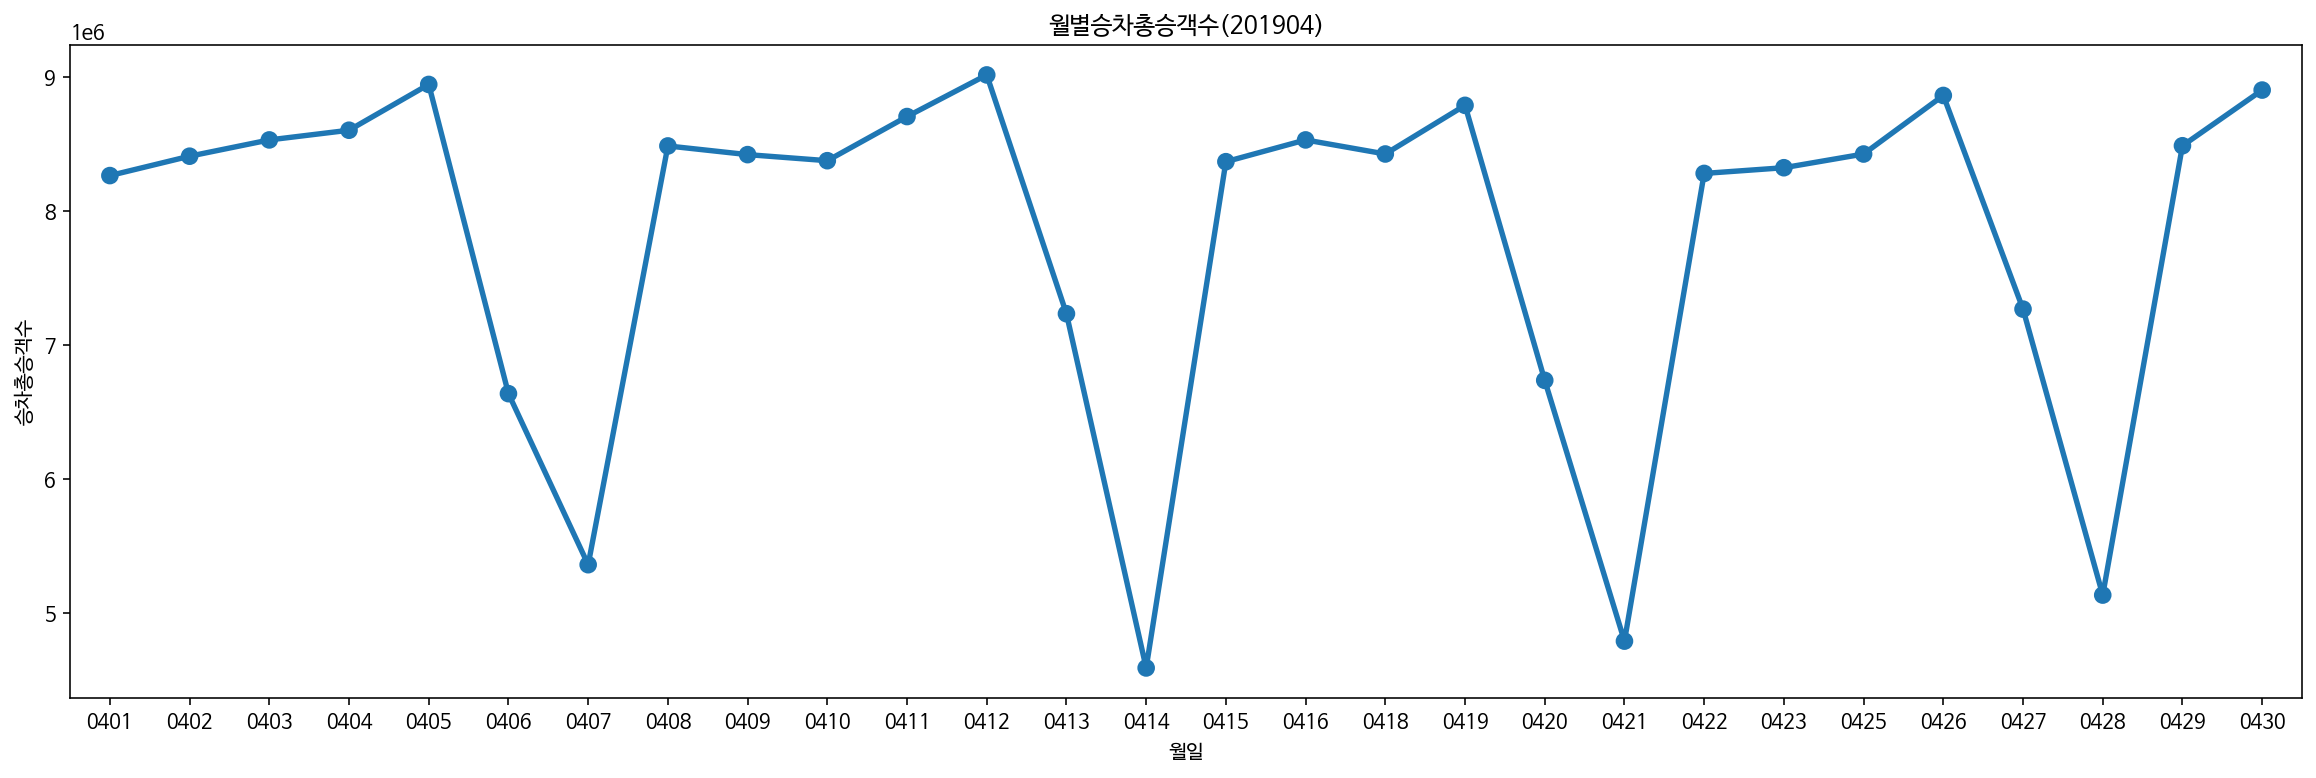

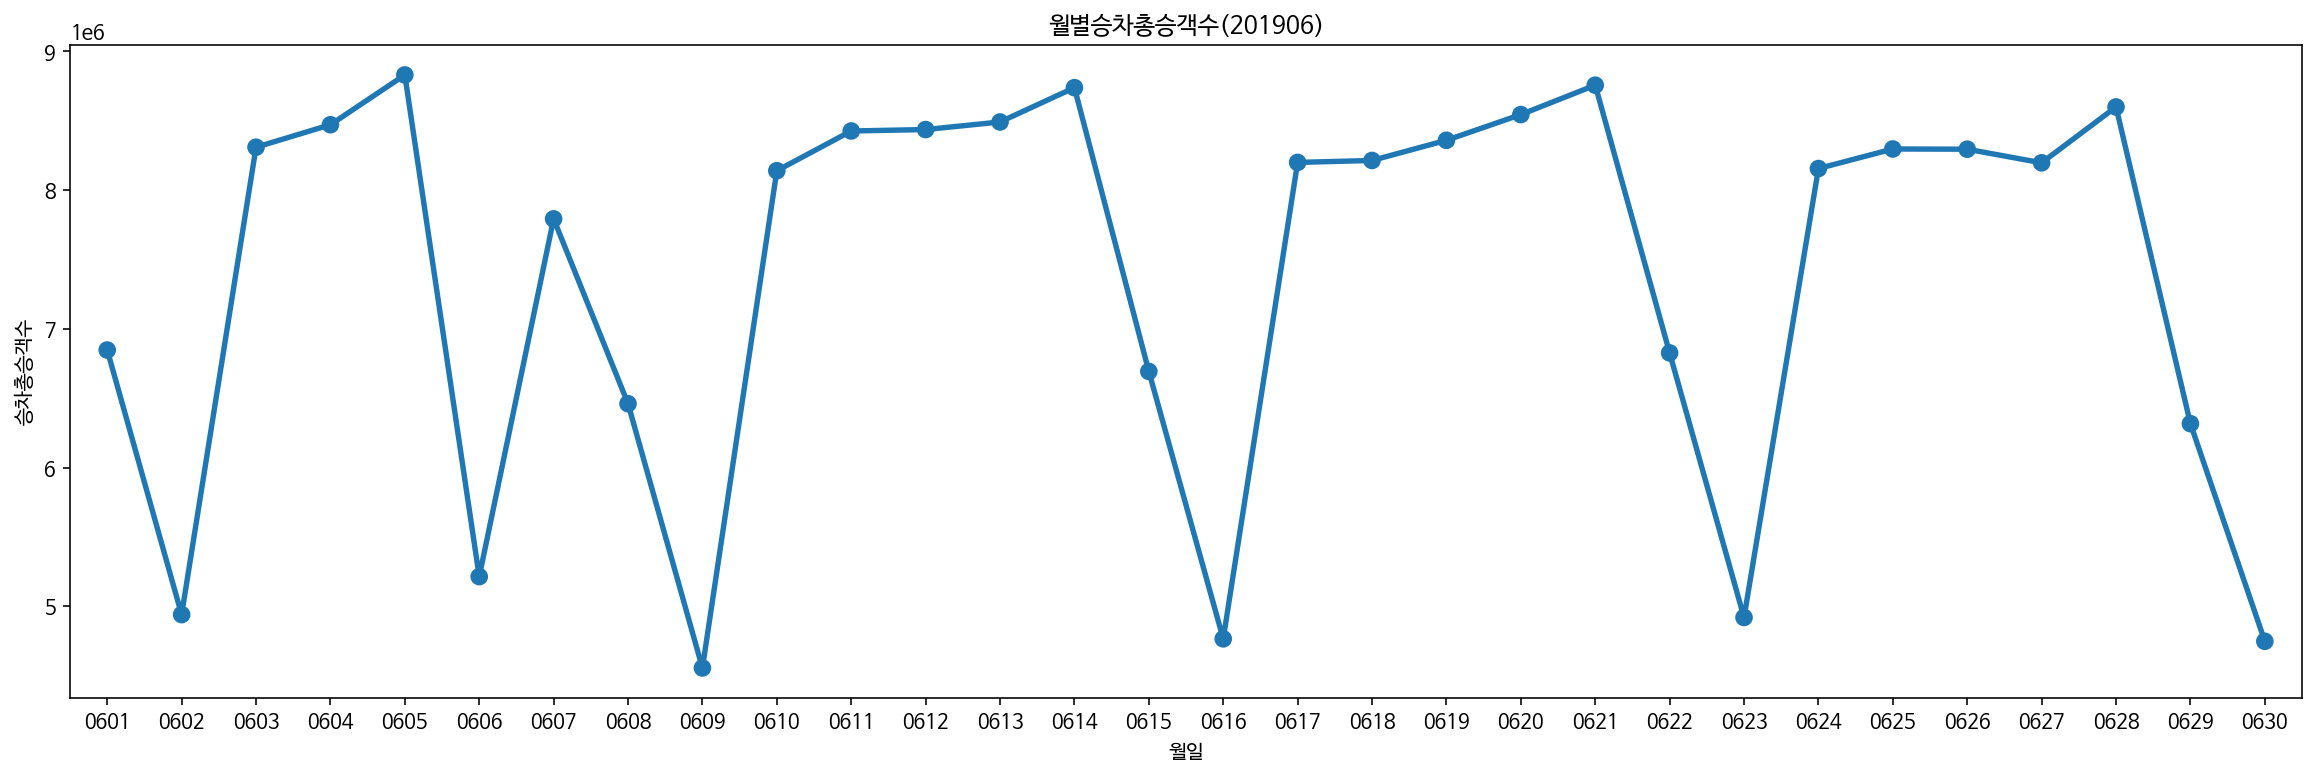

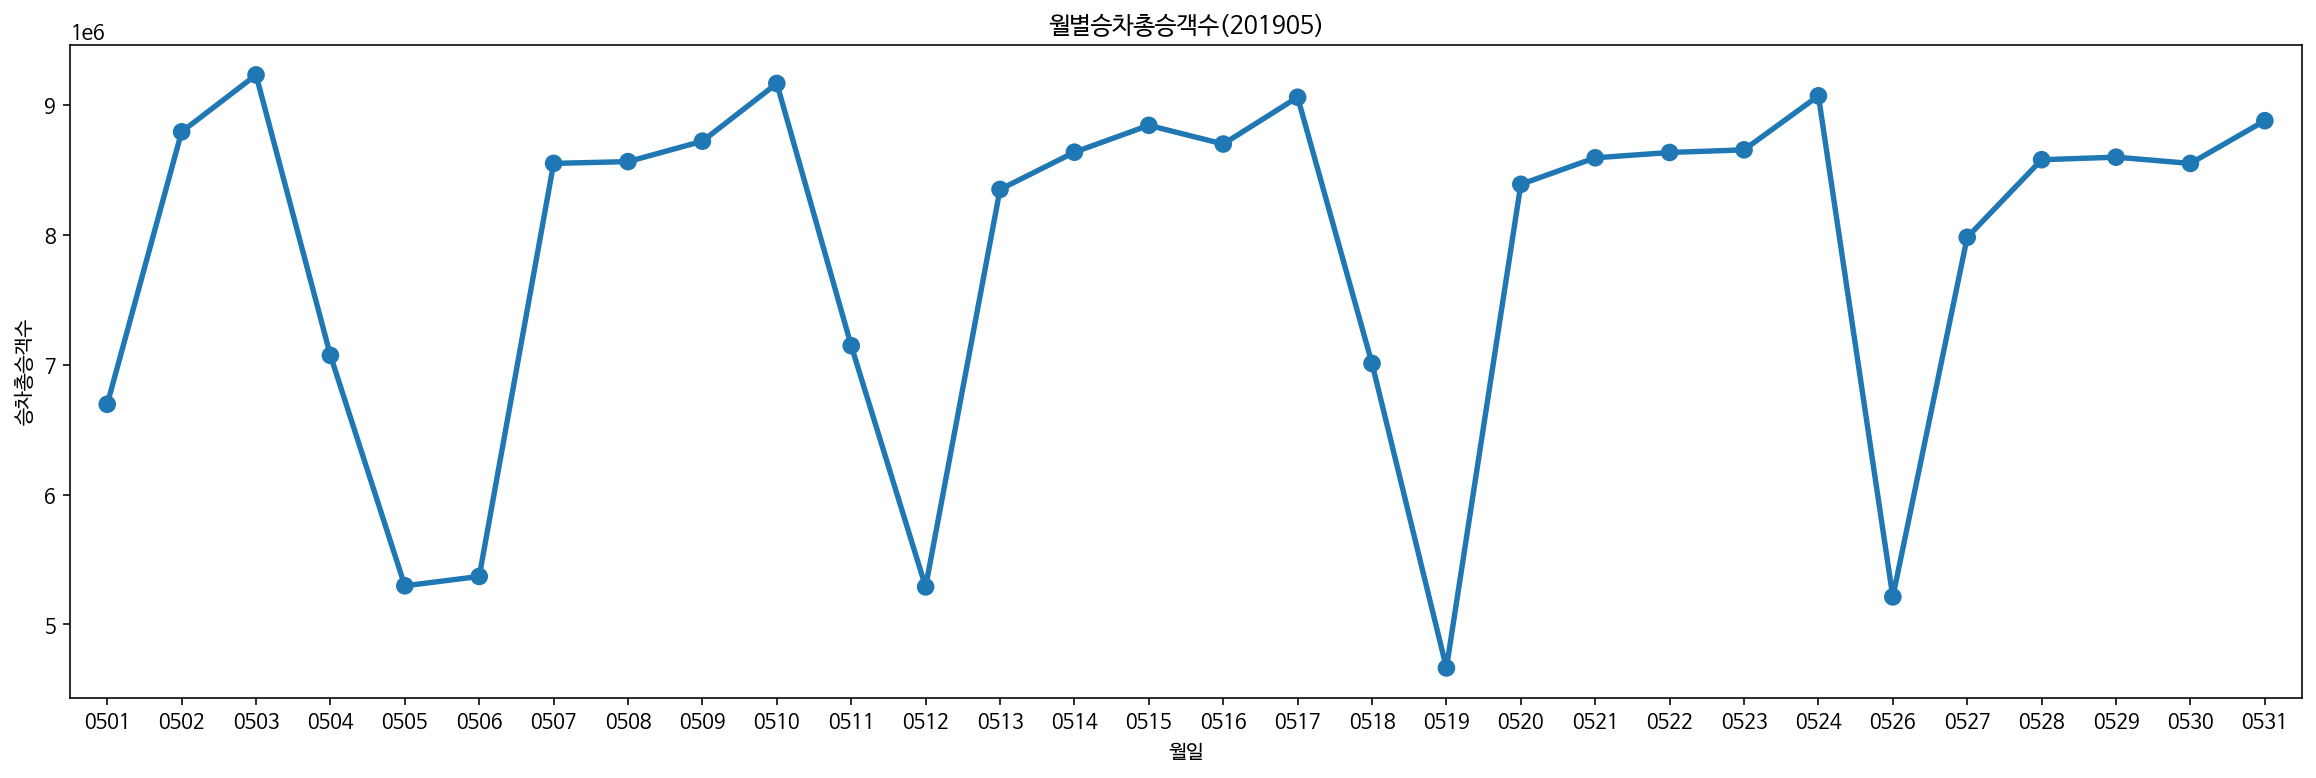

In [29]:

for yearmonth in raw['연월'].unique():
  df_selected = raw[raw['연월'] == yearmonth]
  df_pivot = df_selected.pivot_table(index = ['월일','요일'], values = '승차총승객수', aggfunc='sum')
  df_pivot = df_pivot.reset_index()

  fig,ax = plt.subplots(figsize=(20,6))
  ax.set_title(f'월별승차총승객수({yearmonth})')
  sns.pointplot(data = df_pivot,x = '월일',y='승차총승객수')

  